# Measuring Complexity in Python with ECoL

## Importing `rpy2r` dependencies

In [15]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1)  # select the first mirror in the list

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f64b0ee5b40> [RTYPES.NILSXP]

## Importing `ECOL` Package

In [ ]:
utils.install_packages("ECoL")

In [17]:
ecol = rpackages.importr('ECoL')

## Import a dataframe

### Import a generic Dataframe

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

### Conversion to R Dataframe

In [19]:
from rpy2.robjects import pandas2ri

pandas2ri.activate()

r_df = pandas2ri.py2rpy(df)

## Measuring Complexity

In [20]:
from rpy2.robjects import Formula

fml = Formula('target ~ .')

### Feature Measure

#### F1

In [21]:
f1Vector = ecol.overlapping_formula(fml, df, measures="F1", summary="return")

In [22]:
f1Dict = pandas2ri.rpy2py_listvector(f1Vector)

print(f1Dict)

$F1
return.sepal.length..cm.  return.sepal.width..cm. return.petal.length..cm. 
              0.38129427               0.59921715               0.05862828 
 return.petal.width..cm. 
              0.07111707 




#### F2

In [23]:
f2Vector = ecol.overlapping_formula(fml, r_df, measures="F2")
f2 = f2Vector.rx(1)
print(f2Vector)
print(f2[0][0])

$F2
       mean          sd 
0.006381766 0.011053544 


0.006381766381766379


#### Verifying the overlapping

As we can see before on `F1` measure, there's 2 measures in which the overlap is low, thus, easily separable. These measures are `petal.length` (close to **5.86%** of overlapping) and `petal.width` (which have **7.11%** of overlapping)

<AxesSubplot:>

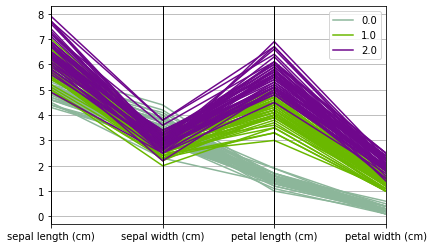

In [24]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, class_column='target')

Visually, we can see that as well, but the advantage of ECoL is to be able to measure these values. Take the difference between `sepal.length` and `sepal.width`, visually we can't see much because of the overlapping, but when we measure these values, we can get that `sepal.length` has less overlapping than `sepal.width`.

### Balance Measure

#### C2

In [34]:
c2Vector = ecol.balance_formula(fml, r_df, measures="C2", summary="return")

c2 = c2Vector.rx(1)

print(c2[0][0])

0.0


In [35]:
c2Dict = pandas2ri.rpy2py_listvector(c2Vector)

print(c2Dict)

$C2
[1] 0




### Linearity Measure

#### L2

In [36]:
l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")

l2 = l2Vector.rx(1)

print(l2)

$L2
    return 
0.01160101 




### Neighborhood Measure

#### N1

In [37]:
n1Vector = ecol.neighborhood_formula(fml, df, measures="N1")
n1 = n1Vector.rx(1)

print(n1)
n1[0][0]

$N1
[1] 0.1066667




0.10666666666666667

#### N2

In [38]:
n2Vector = ecol.neighborhood_formula(fml, df, measures="N2")
n2 = n2Vector.rx(1)

print(n2)
print(n2[0][0])

$N2
     mean        sd 
0.1981444 0.1466933 


0.19814444234467493


#### T1

In [39]:
t1Vector = ecol.neighborhood_formula(fml, df, measures="T1")
t1 = t1Vector.rx(1)

print(t1)
print(t1[0][0])

$T1
      mean         sd 
0.05555556 0.09094996 


0.05555555555555556


### Network Measures

#### Clustering Coefficient

In [40]:
clscoefVector = ecol.network_formula(fml, df, measures="ClsCoef", summary="return")
clscoef = clscoefVector.rx(1)

print(clscoef)

$ClsCoef
[1] 0.267977




### Dimensionality Measure

#### T2

In [41]:
t2Vector = ecol.dimensionality_formula(fml, df, measures="T2", summary="return")

print(t2Vector)

[0.02666667]
